# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Capstone Project


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Capstone Overview


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> Objective:

- To undertake a multi-faceted project that demonstrates your understanding and mastery of the key conceptual and technological aspects of Deep Learning.
- To develop an understanding of how challenging human-level problems can be approached and solved using a combination of tools and techniques.
- To understand current scenarios in deep learning, understand the practicalities and the trade-offs that need to be made when solving a problem in real life.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Milestones:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> This project has 2 milestones.

You get 3 weeks for completing each milestone.
The 1st milestone should be submitted as part of the interim report.

### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#da614e"> 1st Milestone:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 1. Problem interpretation

- Understand the data
- Make an abstract or an overview based on your approach
- Break the problem into smaller tasks
- Discuss among your teammates and share responsibilities

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 2. Data analysis and preprocessing:

Visual displays are powerful when used well, so think carefully about the information the display.

- Include any insightful visualization
- Share and explain particularly meaningful features, interactions or summary of data
- Display examples to input in your model
- Explain changes to be incorporated into data so that it becomes ready for the model

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 3. Modeling

- What kind of neural network you have used and why?
- What progress you have made towards your intended solution?


### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#da614e"> 2nd Milestone

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 4. Model evaluation

- Describe how you will proceed with the analysis
- Compare different models and choose which model to use
- Do hyper-parameter tuning of your model
- How will you build on your initial analysis to increase the accuracy of your model?

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 5. Presentation and Report

- You should start preparing the final report at least 2 weeks prior to the project completion date.
- Teams should send a draft Last of the project before the last session to the mentor and get the necessary inputs for submission.
- The expectations for the final report will be included in your Capstone course page


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Problem Statement


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> DOMAIN:

Health Care

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> CONTEXT:

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> DATA DESCRIPTION:

    - In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia.
    - Dicom original images: Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data.
    - Dataset has been attached along with this project. Please use the same for this capstone project.
    - Original  link  to  the  dataset  : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data[for your reference only]. You can refer to the details of the dataset in the above link
    - Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> PROJECT OBJECTIVE:

Design a DL based algorithm for detecting pneumonia.


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> PROJECT TASK: [ Score: 100 points]

1. Milestone 1:[ Score: 40 points]
   - Input: Context and Dataset
   - Process:
     - Step 1: Import the data. [ 3 points ]
     - Step 2: Map training and testing images to its classes. [ 4 points ]
     - Step 3: Map training and testing images to its annotations. [ 4 points ]
     - Step 4: Preprocessing and Visualisation of different classes [4 Points]
     - Step 5: Display images with bounding box. [ 5 points ]
     - Step 6: Design, train and test basic CNN models for classification. [ 10 points ]
     - Step 7: Interim report [ 10 points ]
   - Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
2. Milestone 2: [ Score: 60 points]
   - Input: Preprocessed output from Milestone-1
   - Process:
     - Step 1: Fine tune the trained basic CNN models for classification. [ 5 points ]
     - Step 2: Apply Transfer Learning model for classification [4 points]
     - Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest. [ 8 points ]
     - Step 4: Pickle the model for future prediction [ 3 Points]
     - Step 5: Final Report [40 Points]
   - Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2
3. Milestone 3: [ Optional ]
   - Process:
     - Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
       -Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface


### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Notebook Setup


In [1]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pydicom as dcm
from tqdm import tqdm_notebook

In [2]:
# Plot settings for matplotlib

# Set the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Set the default figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Set the default font size
plt.rcParams['font.size'] = 14

# Update rcParams to use Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Set the default line width
plt.rcParams['lines.linewidth'] = 2

# Set the default marker size
plt.rcParams['lines.markersize'] = 8

# Define your custom palette with at least 10 colors
custom_palette = [
    "#ffcc99", # Light Orange
    "#8EB897", # Soft Green
    "#ff9999", # Light Pink
    "#66B2FF", # Light Blue
    "#FFD700", # Gold
    "#D2691E", # Chocolate
    "#6495ED", # Cornflower Blue
    "#FF6347", # Tomato
    "#32CD32", # Lime Green
    "#BA55D3"  # Medium Orchid
]

# Set the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Set the default grid style
plt.rcParams['axes.grid'] = True

# Set the default grid color
plt.rcParams['grid.color'] = '#e0e0e0'

# Set the default grid linestyle
plt.rcParams['grid.linestyle'] = '--'

# Set the default grid linewidth
plt.rcParams['grid.linewidth'] = 0.5

# Set the default axis label size
plt.rcParams['axes.labelsize'] = 16

# Set the default tick label size
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Set the default legend font size
plt.rcParams['legend.fontsize'] = 14

# Set the default legend frame alpha
plt.rcParams['legend.framealpha'] = 0.8

# Set the default legend loc
plt.rcParams['legend.loc'] = 'best'

# Set the default savefig dpi
plt.rcParams['savefig.dpi'] = 300

# Set the default savefig format
plt.rcParams['savefig.format'] = 'png'

# Set the default savefig bbox_inches
plt.rcParams['savefig.bbox'] = 'tight'

# Set the default savefig transparent
plt.rcParams['savefig.transparent'] = False

# Set the default savefig pad_inches
plt.rcParams['savefig.pad_inches'] = 0.1

# Set the default savefig facecolor
plt.rcParams['savefig.facecolor'] = 'white'

# Set the default savefig edgecolor
plt.rcParams['savefig.edgecolor'] = 'white'

# Set the default savefig orientation
plt.rcParams['savefig.orientation'] = 'portrait'

# Set the default savefig transparent
plt.rcParams['savefig.transparent'] = False

### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Step 1: Import the data. [3 points]


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.1: Define directory paths, file paths and import the labels


In [3]:
# Define the directory paths and file paths

labels_dir = "labels/"
output_dir = "output/"
data_dir = "data/"
train_images_dir = "data/stage_2_train_images/"
test_images_dir = "data/stage_2_test_images/"

TRAIN_IMAGE_LABELS_FILE = os.path.join(labels_dir, "stage_2_train_labels.csv")
CLASS_INFO_FILE = os.path.join(labels_dir, "stage_2_detailed_class_info.csv")
TEST_IMAGE_LABELS_FILE = os.path.join(labels_dir, "stage_2_test_labels.csv")

### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.2: Import the bounding box and training label data and inspect it


In [4]:
# Read the bounding box and training labels from csv files using pandas
bbox_train_label_data = pd.read_csv("labels/stage_2_train_labels.csv")

In [5]:
# Inspect the boudning box and train labels data
print("Train labels:\n")
bbox_train_label_data.head(10)

Train labels:



,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [6]:
# Print the metadata for bbox_train_label_data dataframe
print("Train labels info:\n")
bbox_train_label_data.info()

Train labels info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- The bbox_train_label_data dataframe contains bounding box corrdinates for each patient.
- It also contains a trainig label column "Target" which indicates if the patient has pneumonia or not.
- Some patients have more than one bounding box.
- The "Target" value 0 indicates that pneumonia is not present, 1 indicates that pneumonia is present.


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.3: Create a dataframe for saving the image path and the corresponding patient IDs


In [7]:
# Create dataframes for train and test image paths with respective patient IDs

train_images_data = pd.DataFrame(
    {"path": glob(os.path.join(train_images_dir, "*.dcm"))}
)
train_images_data["patientId"] = train_images_data["path"].map(
    lambda x: os.path.splitext(os.path.basename(x))[0]
)
test_images_data = pd.DataFrame({"path": glob(os.path.join(test_images_dir, "*.dcm"))})
test_images_data["patientId"] = test_images_data["path"].map(
    lambda x: os.path.splitext(os.path.basename(x))[0]
)

In [8]:
# Inspect the train image paths and patient IDs data

train_images_data.head(10)

,path,patientId
0,data/stage_2_train_images/ec811ac3-19ca-4a43-9...,ec811ac3-19ca-4a43-990b-4e4704a7b649
1,data/stage_2_train_images/a45992b1-aa71-495b-b...,a45992b1-aa71-495b-ba52-cbbda9f2d876
2,data/stage_2_train_images/b1d07564-9432-4844-b...,b1d07564-9432-4844-b8f7-0b968e3b9683
3,data/stage_2_train_images/a0c6c07c-17b8-4d76-9...,a0c6c07c-17b8-4d76-9c54-e88deb2b5039
4,data/stage_2_train_images/d451ba32-c341-4588-9...,d451ba32-c341-4588-9b12-5afcdcf0eea1
5,data/stage_2_train_images/3efbee9b-0174-45fa-b...,3efbee9b-0174-45fa-b81c-f0f23397b74b
6,data/stage_2_train_images/f54cc1dd-2929-4b50-a...,f54cc1dd-2929-4b50-a0ed-6778734cd9a7
7,data/stage_2_train_images/ed20cdc6-e8f7-4551-a...,ed20cdc6-e8f7-4551-a8d5-6b360b3f9c71
8,data/stage_2_train_images/c3a5e685-166b-4f22-b...,c3a5e685-166b-4f22-b9bb-151a0040e0ee
9,data/stage_2_train_images/824a4fda-1ff7-4ab9-b...,824a4fda-1ff7-4ab9-bf6e-21fe6fa37f67


In [9]:
train_images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       26684 non-null  object
 1   patientId  26684 non-null  object
dtypes: object(2)
memory usage: 417.1+ KB


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.4: Import the class label information and inspect it


In [10]:
# Read the class label info from csv files using pandas
class_label_data = pd.read_csv("labels/stage_2_detailed_class_info.csv")

In [11]:
# Inspect the Class info
print("\nClass details:\n")
class_label_data.head(10)


Class details:



,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [12]:
# Print the metadata for Class details
print("Class details info:\n")
class_label_data.info()

Class details info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- The class_label_data dataframe contains patient IDs and the corresponding class for each patient.
- The dataframe has repeat entries for patients with multiple bounding boxes.
- There are three classes in the dataset: `Normal`, `Lung Opacity`, `No Lung Opacity / Not Normal`.


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.5: Check for consistency of data in the bbox_train_label_data, train_images_data and class_label_data dataframes


In [13]:
# Cheking for duplicates in the dataframes and see if they are consistent

print(
    "Number of duplicates in bbox_train_label_data dataframe: {}".format(
        len(bbox_train_label_data) - (bbox_train_label_data["patientId"].nunique())
    )
)
print(
    "Number of duplicates in class_label_data dataframe: {}".format(
        len(class_label_data) - (class_label_data["patientId"].nunique())
    )
)

Number of duplicates in bbox_train_label_data dataframe: 3543
Number of duplicates in class_label_data dataframe: 3543


In [14]:
# Check if the number of unique records in the all dataframes are same

print(
    "Number of unique records in bbox_train_label_data dataframe: {}".format(
        bbox_train_label_data["patientId"].nunique()
    )
)
print(
    "Number of unique records in class_label_data dataframe: {}".format(
        class_label_data["patientId"].nunique()
    )
)

print(
    "Number of unique records in train_images_data dataframe: {}".format(
        train_images_data["patientId"].nunique()
    )
)

Number of unique records in bbox_train_label_data dataframe: 26684
Number of unique records in class_label_data dataframe: 26684
Number of unique records in train_images_data dataframe: 26684


In [15]:
# Verify each patient is only associated with only one class

print(
    "Each patientId is associated with only {} class".format(
        class_label_data.groupby(["patientId"])["class"].nunique().max()
    )
)

Each patientId is associated with only 1 class


## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- The number of duplicates in both bbox_train_label_data and class_label_data dataframes are equal.
- That means that the number of bounding boxes for a patient in bbox_train_label_data is equal to the number of entries for that patient in the class_label_data.
- The number of unique patient IDs in the bounding box label data is 26684, that is equal to the number of training images.
- Also each patient has a unique class.


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.6: Read and inspect a sample image file


In [16]:
# Inspect one sample train image file metadata
sample_image_file = train_images_data["path"].values[0]
sample_image_metadata = dcm.read_file(sample_image_file)

print(sample_image_metadata)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4323.1517874307.136197
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4323.1517874307.136197
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [17]:
# Define a function to extract the metadata from the DICOM files


def get_metadata_from_dicom(data, paths):
    for path in paths:
        img_data = dcm.read_file(path)
        idx = data["patientId"] == img_data.PatientID
        data.loc[idx, "patientSex"] = img_data.PatientSex
        data.loc[idx, "patientAge"] = pd.to_numeric(img_data.PatientAge)
        data.loc[idx, "viewPosition"] = img_data.ViewPosition

    return data

In [18]:
# Read the useful metadata from the file and save it in the training_images_data dataframe
train_images_data = get_metadata_from_dicom(
    train_images_data, train_images_data["path"]
)

In [19]:
train_images_data.head(10)

,path,patientId,patientSex,patientAge,viewPosition
0,data/stage_2_train_images/ec811ac3-19ca-4a43-9...,ec811ac3-19ca-4a43-990b-4e4704a7b649,M,51.0,AP
1,data/stage_2_train_images/a45992b1-aa71-495b-b...,a45992b1-aa71-495b-ba52-cbbda9f2d876,M,24.0,PA
2,data/stage_2_train_images/b1d07564-9432-4844-b...,b1d07564-9432-4844-b8f7-0b968e3b9683,M,51.0,AP
3,data/stage_2_train_images/a0c6c07c-17b8-4d76-9...,a0c6c07c-17b8-4d76-9c54-e88deb2b5039,F,66.0,AP
4,data/stage_2_train_images/d451ba32-c341-4588-9...,d451ba32-c341-4588-9b12-5afcdcf0eea1,F,52.0,PA
5,data/stage_2_train_images/3efbee9b-0174-45fa-b...,3efbee9b-0174-45fa-b81c-f0f23397b74b,F,45.0,PA
6,data/stage_2_train_images/f54cc1dd-2929-4b50-a...,f54cc1dd-2929-4b50-a0ed-6778734cd9a7,F,33.0,PA
7,data/stage_2_train_images/ed20cdc6-e8f7-4551-a...,ed20cdc6-e8f7-4551-a8d5-6b360b3f9c71,M,64.0,AP
8,data/stage_2_train_images/c3a5e685-166b-4f22-b...,c3a5e685-166b-4f22-b9bb-151a0040e0ee,F,11.0,PA
9,data/stage_2_train_images/824a4fda-1ff7-4ab9-b...,824a4fda-1ff7-4ab9-bf6e-21fe6fa37f67,F,19.0,PA


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 1.7: Analyse the bbox_train_label_data dataframe


In [20]:
# Define a function to display the count of columns in dataframe


def countPlot(column, df):
    ax = sns.countplot(x=column, data=df, hue=column)

    for p in ax.patches:
        ax.annotate(
            "{}".format(p.get_height()),
            (p.get_x() + (p.get_linewidth() / 2.0 - 0.1), p.get_height() + 200),
            ha="center",
        )

    plt.show()

Nulls in bounding boxes: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}
Null value counts for the targets: {0: 20672, 1: 9555}


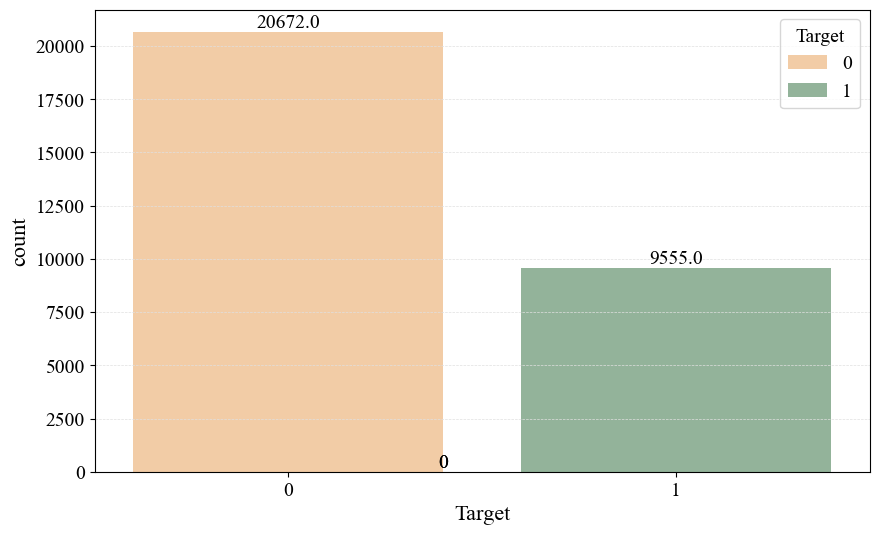

In [21]:
# Check for null values in the dataframes and if it is consistent with the count of targets

print(
    "Nulls in bounding boxes: {}".format(
        bbox_train_label_data[["x", "y", "width", "height"]].isnull().sum().to_dict()
    )
)

print(
    "Null value counts for the targets: {}".format(
        bbox_train_label_data["Target"].value_counts().to_dict()
    )
)


countPlot("Target", bbox_train_label_data)

## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- For patients with no pneumonia, the bounding box coordinates are null.
- The total number of bounding boxes with null values (for cols "x", "y", "width", "height") is 20672.
- This is consistent with the Target count of 20672 for Target = 0.
- The total number of bounding boxes with non-null values (for cols "x", "y", "width", "height") is 9555.
- This is consistent with the Target count of 9555 for Target = 1.


### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Step 2: Map training and testing images to its classes. [ 4 points ]


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 2.1: Combine the train_images_data and class_label_data dataframes on Patient ID


In [ ]:
# Map the class label data with the train images data

training_metadata = pd.merge(
    class_label_data, train_images_data, on="patientId", how="left"
)

In [ ]:
training_metadata.head(10)

,patientId,class,path,patientSex,patientAge,viewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,data/stage_2_train_images/0004cfab-14fd-4e49-8...,F,51.0,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,data/stage_2_train_images/00313ee0-9eaa-42f4-b...,F,48.0,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,data/stage_2_train_images/00322d4d-1c29-4943-a...,M,19.0,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,data/stage_2_train_images/003d8fa0-6bf1-40ed-b...,M,28.0,PA
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,data/stage_2_train_images/00436515-870c-4b36-a...,F,32.0,AP
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,data/stage_2_train_images/00436515-870c-4b36-a...,F,32.0,AP
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,data/stage_2_train_images/00569f44-917d-4c86-a...,M,54.0,AP
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,data/stage_2_train_images/006cec2e-6ce2-4549-b...,M,78.0,PA
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,data/stage_2_train_images/00704310-78a8-4b38-8...,M,75.0,PA
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,data/stage_2_train_images/00704310-78a8-4b38-8...,M,75.0,PA


In [ ]:
training_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   class         30227 non-null  object 
 2   path          30227 non-null  object 
 3   patientSex    30227 non-null  object 
 4   patientAge    30227 non-null  float64
 5   viewPosition  30227 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 2.2: Unfortunately the test images class labels are not provided in the problem dataset, hence the test image labeling cannot be performed before the model is trained.


### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Step 3: Map training and testing images to its annotations. [ 4 points ]


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 3.1: Combine the bbox_train_label_data and training_metadata dataframes on Patient ID


In [ ]:
# Ensure we can merge the bbox_train_label_data dataframe with the class_label_data on patientId
assert (
    bbox_train_label_data["patientId"].tolist()
    == training_metadata["patientId"].tolist()
)

# Drop pateitnId from the training metadata dataframe
training_metadata.drop("patientId", axis=1, inplace=True)

# Merge the bbox_train_label_data and training_metadata dataframes on patientId
training_metadata = pd.concat([bbox_train_label_data, training_metadata], axis=1)

In [ ]:
# Check the merged dataframe

training_metadata.head(10)

,patientId,x,y,width,height,Target,class,path,patientSex,patientAge,viewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,data/stage_2_train_images/0004cfab-14fd-4e49-8...,F,51.0,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,data/stage_2_train_images/00313ee0-9eaa-42f4-b...,F,48.0,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,data/stage_2_train_images/00322d4d-1c29-4943-a...,M,19.0,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,data/stage_2_train_images/003d8fa0-6bf1-40ed-b...,M,28.0,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,data/stage_2_train_images/00436515-870c-4b36-a...,F,32.0,AP
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity,data/stage_2_train_images/00436515-870c-4b36-a...,F,32.0,AP
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,data/stage_2_train_images/00569f44-917d-4c86-a...,M,54.0,AP
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,data/stage_2_train_images/006cec2e-6ce2-4549-b...,M,78.0,PA
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,data/stage_2_train_images/00704310-78a8-4b38-8...,M,75.0,PA
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity,data/stage_2_train_images/00704310-78a8-4b38-8...,M,75.0,PA


In [ ]:
training_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   x             9555 non-null   float64
 2   y             9555 non-null   float64
 3   width         9555 non-null   float64
 4   height        9555 non-null   float64
 5   Target        30227 non-null  int64  
 6   class         30227 non-null  object 
 7   path          30227 non-null  object 
 8   patientSex    30227 non-null  object 
 9   patientAge    30227 non-null  float64
 10  viewPosition  30227 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.5+ MB


In [ ]:
# Save the final data in pickle format

training_metadata.to_pickle(data_dir + "training_metadata.pkl")

### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 3.2: Unfortunately the test images annotations are not provided in the problem dataset, hence the test image annotation cannot be performed before the model is trained.


### <span style="font-family: Arial; font-weight:bold;font-size:0.7em;color:#da614e"> Step 4: Preprocessing and Visualisation of different classes [4 Points]


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 4.1: Check the values in the training data columns, ensure their type and check for missing values


In [ ]:
# Check the values in the metadata

# Read the metadata from the pickle file
training_metadata = pd.read_pickle(data_dir + "training_metadata.pkl")

# Patient Age
print(
    "Minimum PatientAge in the training dataset: {}".format(
        training_metadata["patientAge"].min()
    )
)
print(
    "Maximum PatientAge in the training dataset: {}".format(
        training_metadata["patientAge"].max()
    )
)

# Patient Sex
print(
    "Unique values in PatientSex: {}".format(training_metadata["patientSex"].unique())
)


# Patient View Position
print(
    "Unique values in ViewPosition: {}".format(
        training_metadata["viewPosition"].unique()
    )
)

Minimum PatientAge in the training dataset: 1.0
Maximum PatientAge in the training dataset: 155.0
Unique values in PatientSex: ['F' 'M']
Unique values in ViewPosition: ['PA' 'AP']


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 4.2: Check for outliers in numerical columns and handle them


<Axes: xlabel='patientAge'>

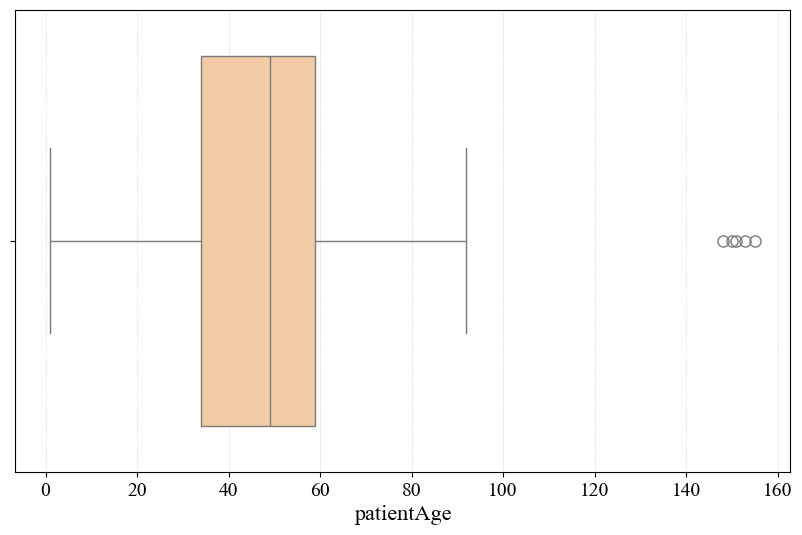

In [ ]:
# Check if patientAge column has got outliers

sns.boxplot(x="patientAge", data=training_metadata, orient="h")

In [ ]:
# Drop the outliers in the patientAge column

patientAge = training_metadata["patientAge"]
Q1 = patientAge.quantile(0.25)
Q3 = patientAge.quantile(0.75)

IQR = Q3 - Q1

# Print the number of outliers dropped
print(
    "Number of outliers dropped: {}".format(
        len(
            training_metadata[
                (training_metadata["patientAge"] < (Q1 - 1.5 * IQR))
                | (training_metadata["patientAge"] > (Q3 + 1.5 * IQR))
            ]
        )
    )
)

# Filter the outliers
training_metadata = training_metadata[
    (training_metadata["patientAge"] >= (Q1 - 1.5 * IQR))
    & (training_metadata["patientAge"] <= (Q3 + 1.5 * IQR))
]

Number of outliers dropped: 5


<Axes: xlabel='patientAge'>

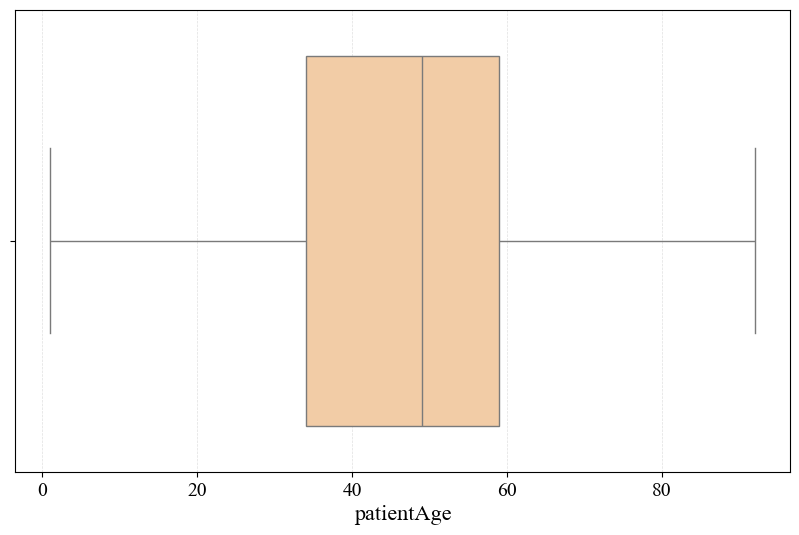

In [ ]:
sns.boxplot(x="patientAge", data=training_metadata, orient="h")

### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 4.3: Check the class imbalance in the data


In [ ]:
# Define a funcition to plot a pie chart for the given list of pandas series


def plotPie(series_list):
    # Determine the number of subplots needed
    num_plots = len(series_list)

    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

    # If there is only one series, axes won't be a list, so we make it a list
    if num_plots == 1:
        axes = [axes]

    # Loop through each series and plot it
    for ax, series in zip(axes, series_list):
        series.value_counts().plot(
            kind="pie",
            autopct="%.0f%%",
            startangle=90,
            title="Distribution of Target",
            ax=ax,
        ).set_ylabel("")

    plt.tight_layout()
    plt.show()

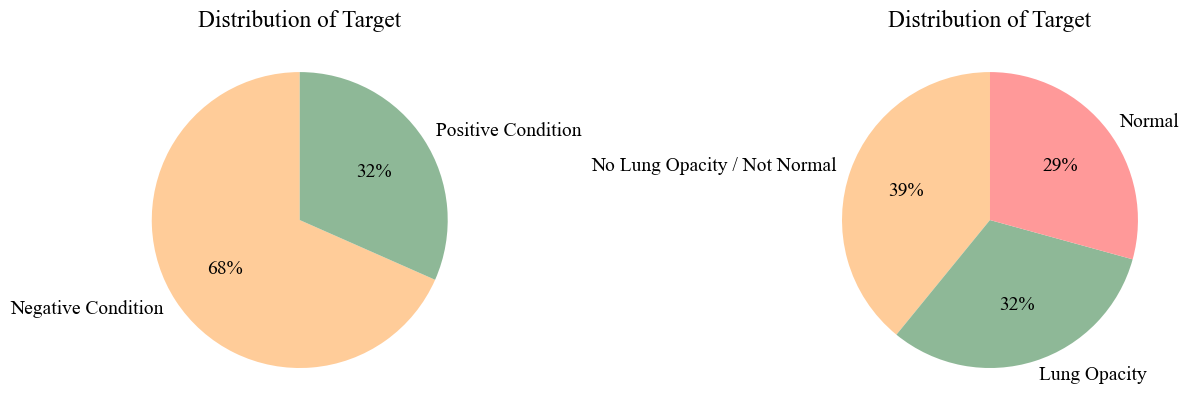

In [ ]:
# Check for the data distribution and imbalance in data.

plotPie(
    [
        training_metadata["Target"].replace(
            {0: "Negative Condition", 1: "Positive Condition"}
        ),
        training_metadata["class"],
    ]
)

## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- Though it appears, the distribution is skewed towards negative condition, the negative condition itself has 2 sub-classes.
- The distribution of the 3 classes can be considered moderatly balanced.
- The `No Lung Opacity / Not Normal` class has the most number of records (39%) followed by the `Lung Opacity` class (32%) and the `Normal` class (29%).
- Furhter data augmentation steps can be taken to perfectly balance the distribution of the classes at a later stage in training the model.


### <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#da614e"> Step 4.4: Check the distribution and skweness in the data


In [ ]:
# Define a function to plot the distribution of a list of series in the dataframe


def plotHist(series, labels, binwidth):
    # Determine the number of subplots needed
    num_plots = len(series)

    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

    # If there is only one column, axes won't be a list, so we make it a list
    if num_plots == 1:
        axes = [axes]

    # Loop through each column and plot it
    for label, s, ax, color in zip(labels, series, axes, custom_palette):
        sns.histplot(s, ax=ax, color=color, binwidth=binwidth).set_title(label)

    plt.tight_layout()
    plt.show()

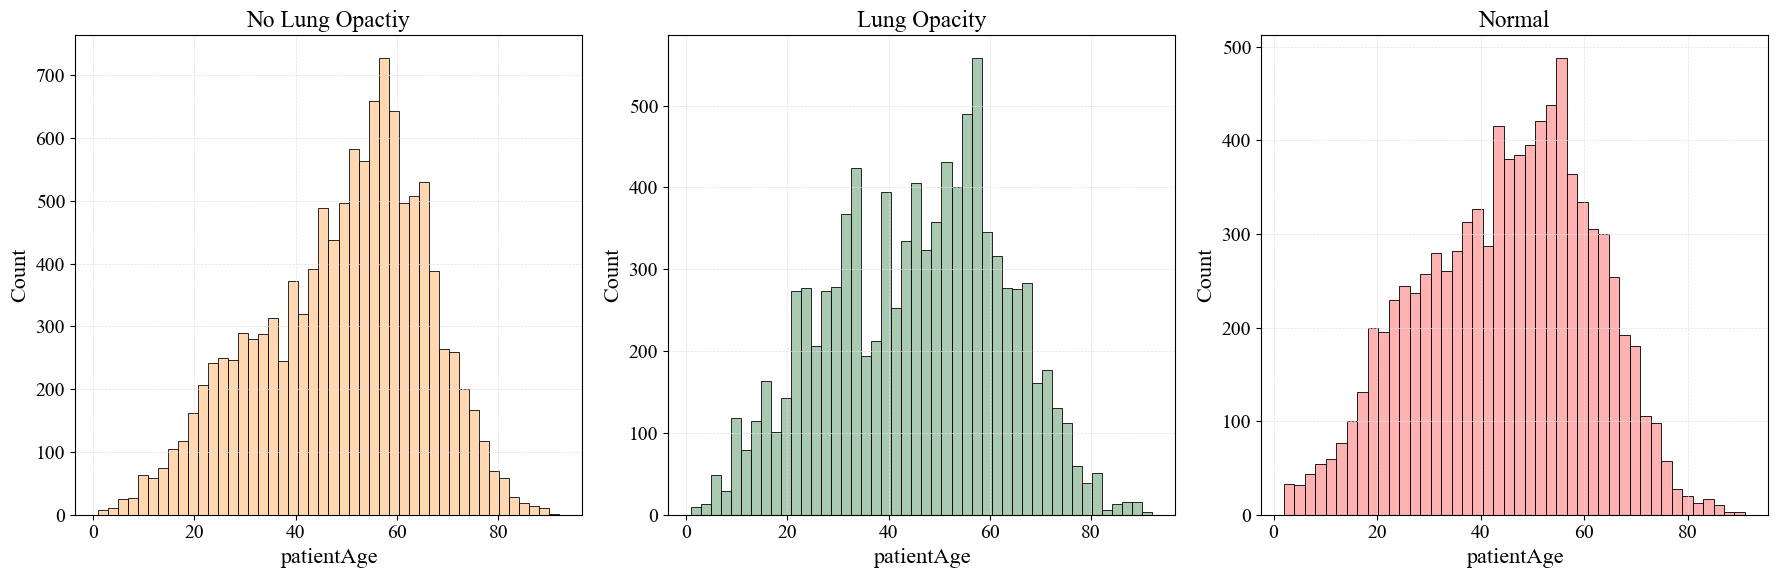

In [ ]:
plotHist(
    [
        training_metadata.loc[
            training_metadata["class"] == "No Lung Opacity / Not Normal", "patientAge"
        ],
        training_metadata.loc[
            training_metadata["class"] == "Lung Opacity", "patientAge"
        ],
        training_metadata.loc[training_metadata["class"] == "Normal", "patientAge"],
    ],
    ["No Lung Opactiy", "Lung Opacity", "Normal"],
    2,
)

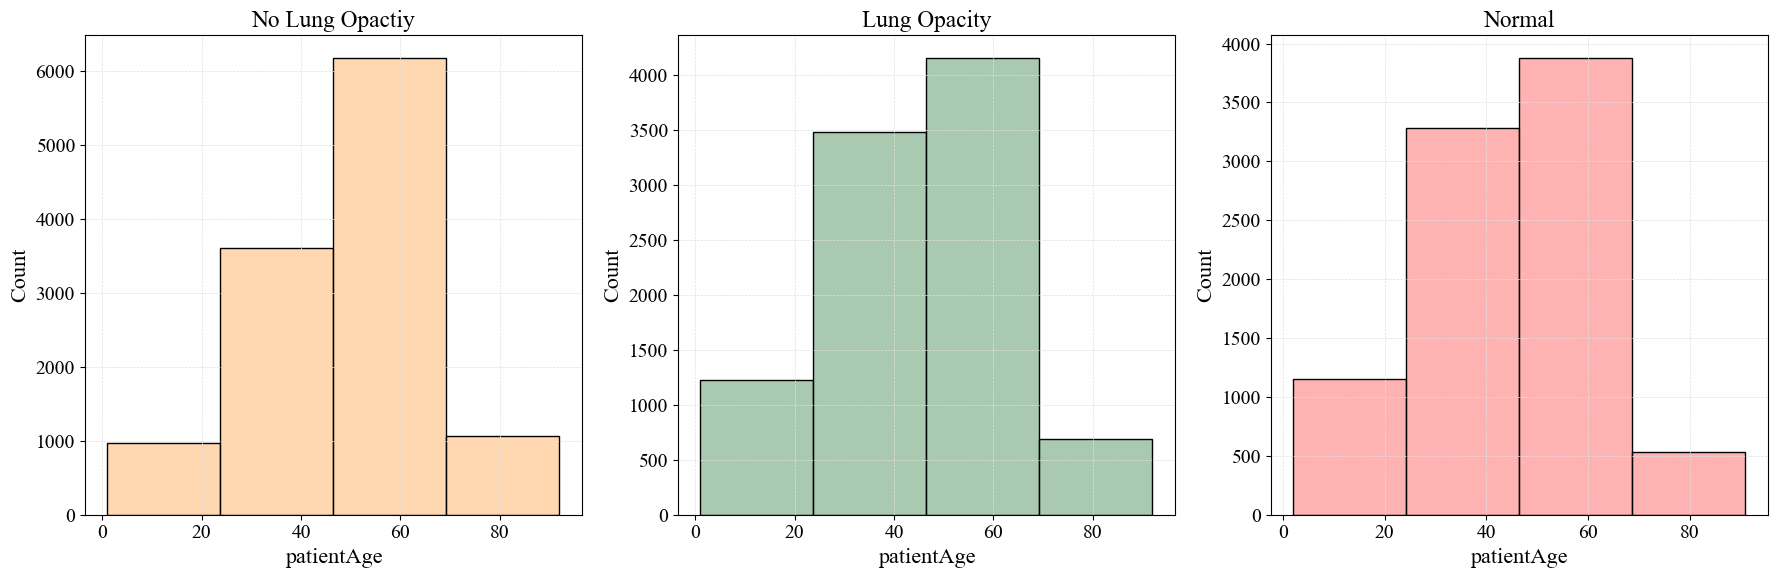

In [ ]:
plotHist(
    [
        training_metadata.loc[
            training_metadata["class"] == "No Lung Opacity / Not Normal", "patientAge"
        ],
        training_metadata.loc[
            training_metadata["class"] == "Lung Opacity", "patientAge"
        ],
        training_metadata.loc[training_metadata["class"] == "Normal", "patientAge"],
    ],
    ["No Lung Opactiy", "Lung Opacity", "Normal"],
    25,
)

## <span style="font-family: Arial; font-weight:bold;font-size:0.5em;color:#E57373"> Main points:

- The distribution appears roughly normal (bell shaped) for all three classes.
- The peak is around the age of 50 to 60 years for all the distributions indicating that the age group is most represented in the dataset.
- Age cannot be a strong predictor of the class as the distribution is similar for all three classes.
